# Inferential Statistics Assignment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)

In [3]:
df[features]['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

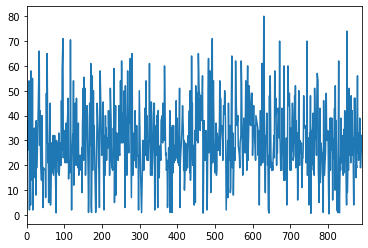

In [4]:
df[features]['age'].plot()

In [5]:
df[features]['fare'].describe()

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: fare, dtype: float64

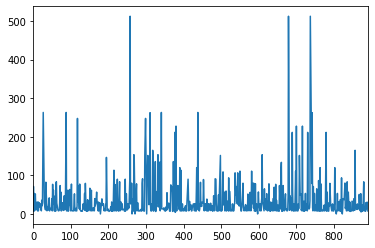

In [6]:
df[features]['fare'].plot()

# Clumsy Carl

What's the p-value?

Would you reject the null hypothesis?

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


In [7]:
dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']

In [8]:
import random
N = 1000000
n=len(dishwashers)
k=5

clumsy = 0
for i in range(N):
    broken_dishes = 0
    for j in range(k):
        r = random.uniform(0,1)
        if r < 1/n:
            broken_dishes += 1
    if broken_dishes > 1:
        clumsy += 1
print(clumsy/N)

0.263177


# Two dice

Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

In [22]:
import numpy as np
import random


def dice(n_rolls):
    rolls_ = []
    for i in range(n_rolls):
        two_dice = random.randint(1, 6) + random.randint(1, 6)
        rolls_.append(two_dice)
    return rolls_

sums_ = dice(100000)
#np.mean(sums_) == 7.00696
#np.std(sums_) == 2.413535910236266

2.413535910236266

What is the standard score (z score) of rolling a 10?

In [24]:
import scipy.stats as st
import numpy as np
import random

def dice(n_rolls):
    count = 0
    for i in range(n_rolls):
        two_dice = random.randint(1, 6) + random.randint(1, 6)
        if two_dice == 10:
            count += 1
    return count/n_rolls

dice(100000)

0.08386

What is the probability of rolling a 10 or higher?

In [25]:
import scipy.stats as st
import numpy as np
import random

def dice(n_rolls):
    count = 0
    for i in range(n_rolls):
        two_dice = random.randint(1, 6) + random.randint(1, 6)
        if two_dice >= 10:
            count += 1
    return count/n_rolls

dice(100000)

0.16455

# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [9]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round((len(x) - 1) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]

In [12]:
y = bootstrap_sample(apples)
percentile(y, 95)

0.7

... and for mean pumpkin weight:

In [13]:
pumpkins = [1, 1, 1, 3, 3, 591]

In [14]:
z = bootstrap_sample(pumpkins)
percentile(z, 95)

3